In [1]:
# Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Creating DataFrame
df_titanic=pd.DataFrame(data=df)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### (Target=Survived ) Categorical data thus using Logistic Regression and Classification Models

In [4]:
target=df_titanic['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [5]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    df_titanic[val]=le.fit_transform(df_titanic[val].astype(str))

In [6]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [7]:
df_new=df_titanic.drop(['Name','Ticket','Cabin'],axis=1)
df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,NaN,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [8]:
df_new.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int32
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


(9.0, 0.0)

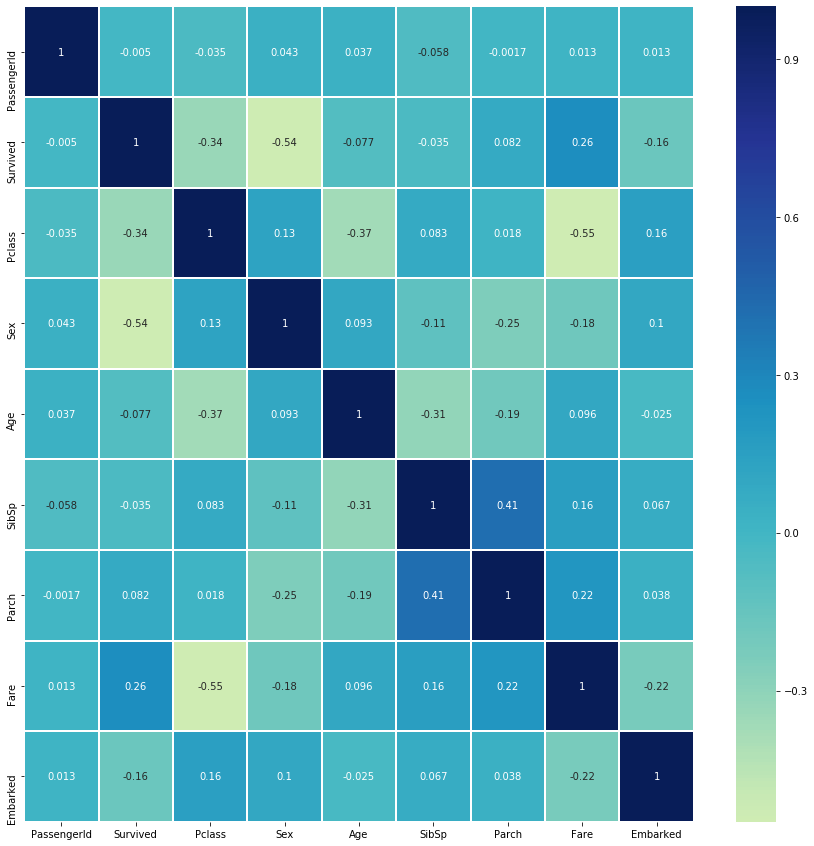

In [10]:
# Heatmap to analyze correlation
fig, ax =plt.subplots(figsize=(15,15))
sns.heatmap(df_titanic.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [11]:
df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,NaN,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [12]:
df_new.isnull().sum()
# There are lots of null data in Age column thus using imputer on the next step

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

PassengerId       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Survived       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Pclass         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Sex            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Age            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
SibSp          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Parch                AxesSubplot(0.125,0.125;0.110714x0.343182)
Fare              AxesSubplot(0.257857,0.125;0.110714x0.343182)
Embarked          AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

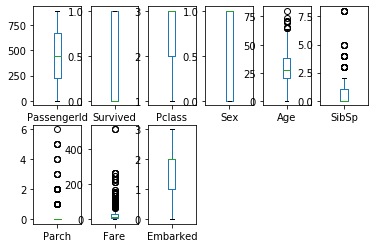

In [13]:
#Box plot
df_new.plot(kind='box',subplots=True,layout=(2,6))

In [14]:
#filling up null values with mean values so that data can be further evaluated
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp=imputer.fit(df_new)
df_data=imp.fit_transform(df_new.values)
print(df_data)
df_final=pd.DataFrame(data=df_data,columns=df_new.columns)
df_final

[[  1.       0.       3.     ...   0.       7.25     2.    ]
 [  2.       1.       1.     ...   0.      71.2833   0.    ]
 [  3.       1.       3.     ...   0.       7.925    2.    ]
 ...
 [889.       0.       3.     ...   2.      23.45     2.    ]
 [890.       1.       1.     ...   0.      30.       0.    ]
 [891.       0.       3.     ...   0.       7.75     1.    ]]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500,2.0
1,2.0,1.0,1.0,0.0,38.000000,1.0,0.0,71.2833,0.0
2,3.0,1.0,3.0,0.0,26.000000,0.0,0.0,7.9250,2.0
3,4.0,1.0,1.0,0.0,35.000000,1.0,0.0,53.1000,2.0
4,5.0,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,1.0,27.000000,0.0,0.0,13.0000,2.0
887,888.0,1.0,1.0,0.0,19.000000,0.0,0.0,30.0000,2.0
888,889.0,0.0,3.0,0.0,29.699118,1.0,2.0,23.4500,2.0
889,890.0,1.0,1.0,1.0,26.000000,0.0,0.0,30.0000,0.0


In [15]:
df_final.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null float64
Survived       891 non-null float64
Pclass         891 non-null float64
Sex            891 non-null float64
Age            891 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null float64
dtypes: float64(9)
memory usage: 62.8 KB


In [17]:
#checking skewness
df_final.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.246689
dtype: float64

In [18]:
#Using log for skewness improvement 
for i in df_final.columns:
    if df_final.skew().loc[i]>0.55:
        df_final[i]=np.log1p(df_final[i])

In [19]:
df_final.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          1.661245
Parch          1.675439
Fare           0.394928
Embarked      -1.246689
dtype: float64

In [20]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df_final))
print(df_final.shape)
df_titanic_new=df_final.loc[(z<3).all(axis=1)]
print(df_titanic_new.shape)
df_titanic_new

(891, 9)
(844, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,1.0,22.000000,0.693147,0.000000,2.110213,2.0
1,2.0,1.0,1.0,0.0,38.000000,0.693147,0.000000,4.280593,0.0
2,3.0,1.0,3.0,0.0,26.000000,0.000000,0.000000,2.188856,2.0
3,4.0,1.0,1.0,0.0,35.000000,0.693147,0.000000,3.990834,2.0
4,5.0,0.0,3.0,1.0,35.000000,0.000000,0.000000,2.202765,2.0
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,1.0,27.000000,0.000000,0.000000,2.639057,2.0
887,888.0,1.0,1.0,0.0,19.000000,0.000000,0.000000,3.433987,2.0
888,889.0,0.0,3.0,0.0,29.699118,0.693147,1.098612,3.196630,2.0
889,890.0,1.0,1.0,1.0,26.000000,0.000000,0.000000,3.433987,0.0


In [21]:
df_titanic_new.skew()

PassengerId    0.008182
Survived       0.417061
Pclass        -0.631176
Sex           -0.594266
Age            0.275362
SibSp          1.409871
Parch          1.604684
Fare           0.955913
Embarked      -1.208124
dtype: float64

PassengerId       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Survived       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Pclass         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Sex            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Age            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
SibSp          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Parch                AxesSubplot(0.125,0.125;0.110714x0.343182)
Fare              AxesSubplot(0.257857,0.125;0.110714x0.343182)
Embarked          AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

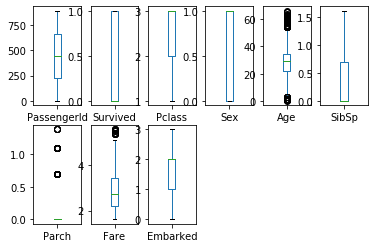

In [22]:
df_titanic_new.plot(kind='box',subplots=True,layout=(2,6))


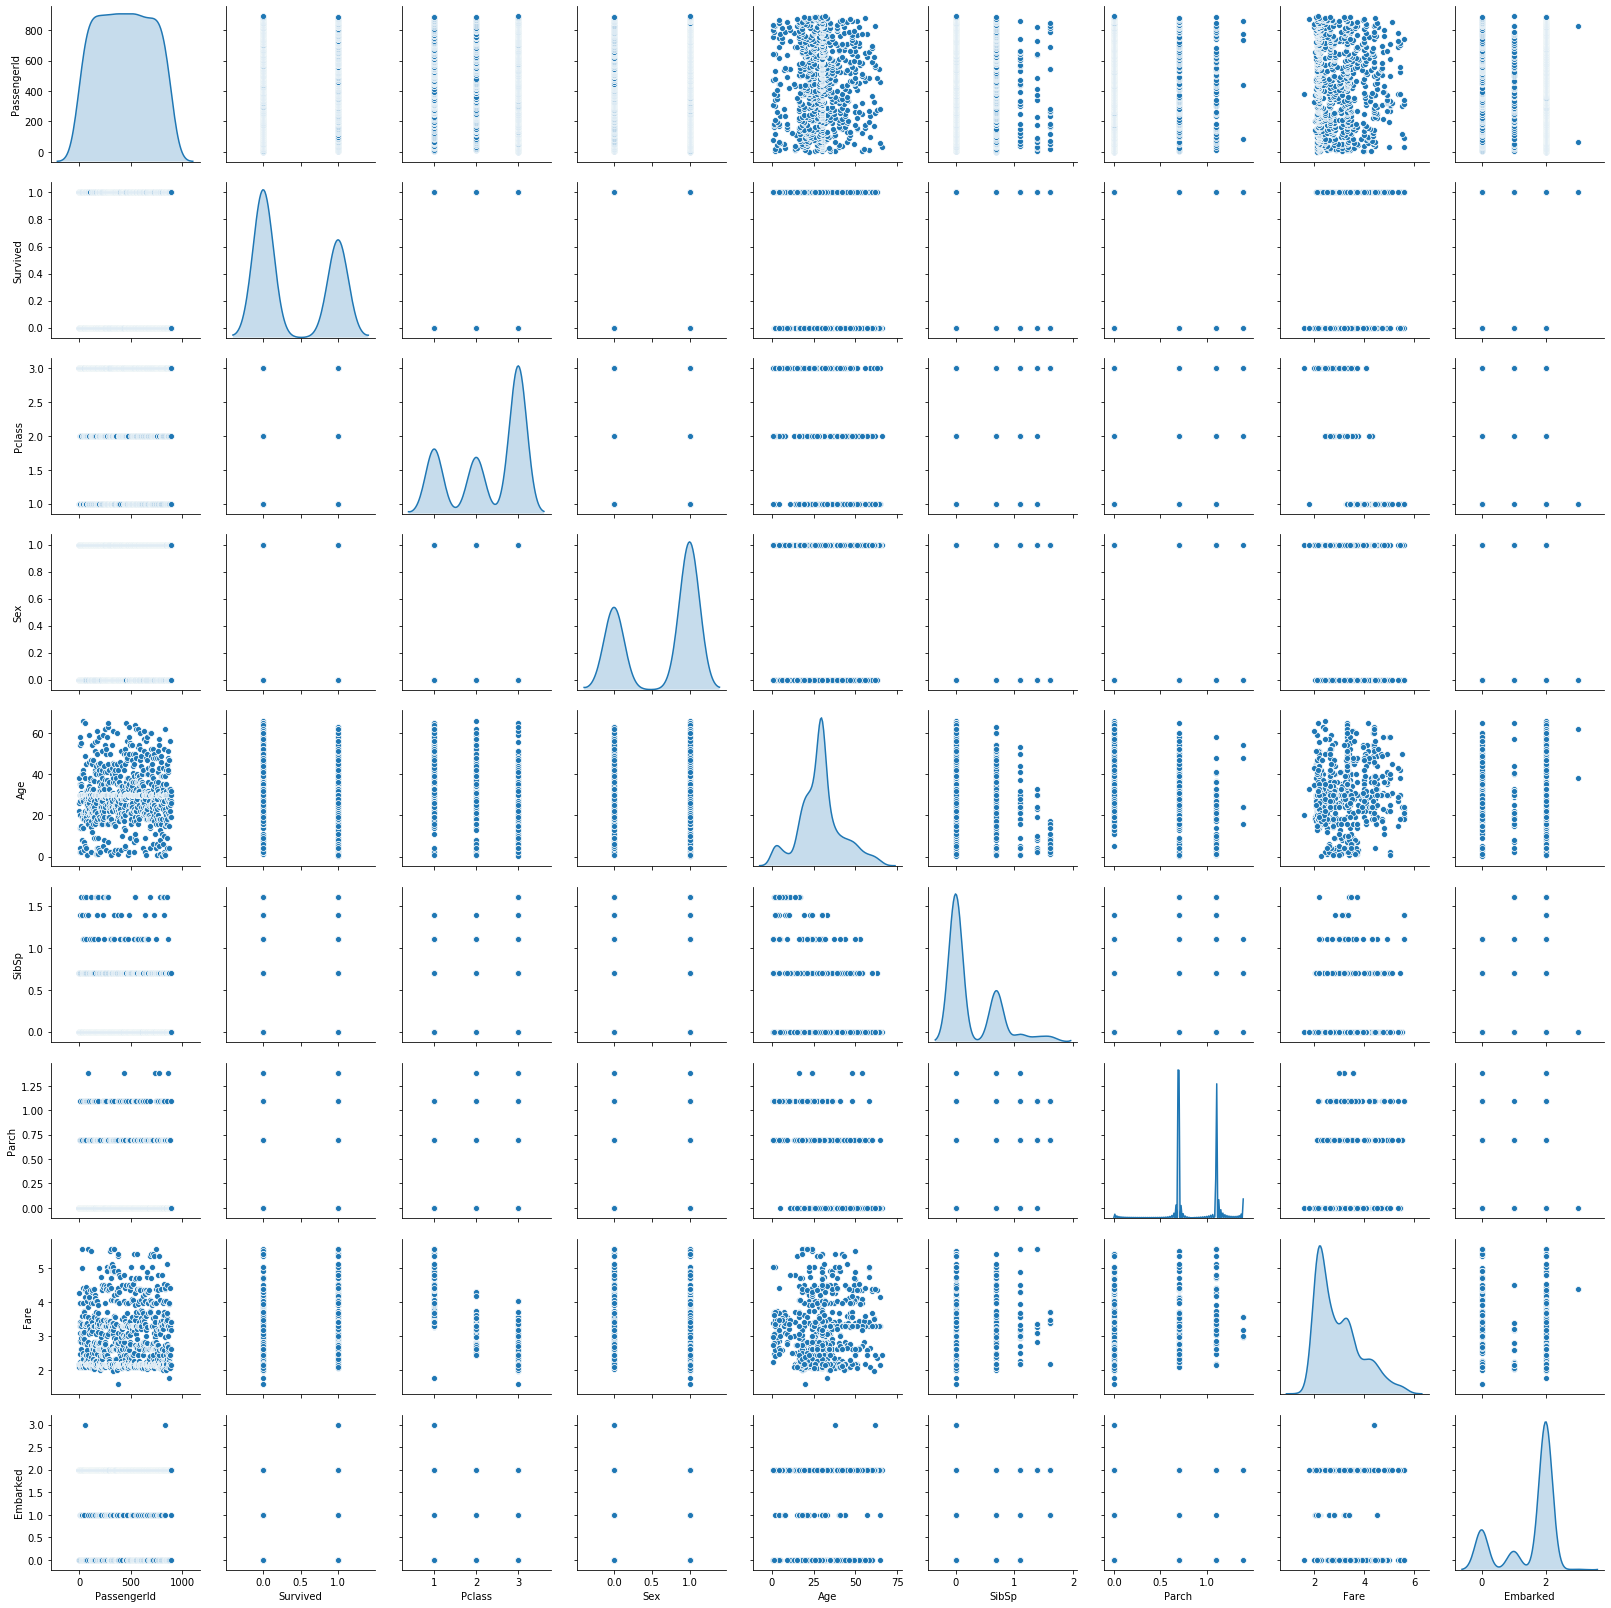

In [23]:
sns.pairplot(df_titanic_new,kind='scatter',diag_kind='kde')

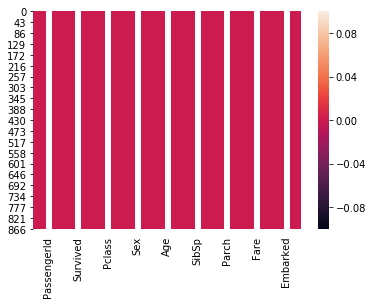

In [24]:
# Heatmap for analyzing null values if any
sns.heatmap(df_titanic_new.isnull(),annot=True)

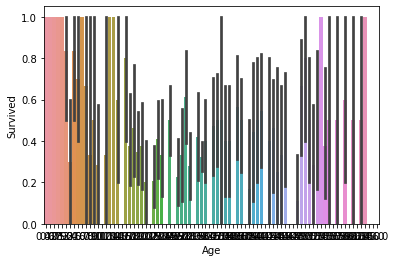

In [25]:
sns.barplot(x='Age',y='Survived',data=df_titanic_new)
plt.show()

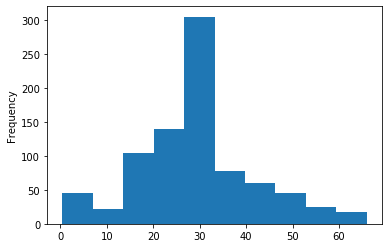

In [26]:
df_titanic_new['Age'].plot.hist()

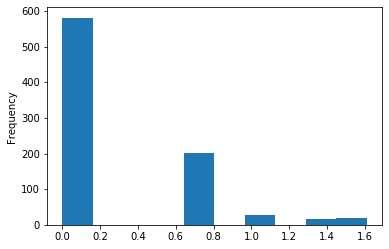

In [27]:
df_titanic_new['SibSp'].plot.hist()

In [28]:
df_titanic_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,1.0,22.000000,0.693147,0.000000,2.110213,2.0
1,2.0,1.0,1.0,0.0,38.000000,0.693147,0.000000,4.280593,0.0
2,3.0,1.0,3.0,0.0,26.000000,0.000000,0.000000,2.188856,2.0
3,4.0,1.0,1.0,0.0,35.000000,0.693147,0.000000,3.990834,2.0
4,5.0,0.0,3.0,1.0,35.000000,0.000000,0.000000,2.202765,2.0
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,1.0,27.000000,0.000000,0.000000,2.639057,2.0
887,888.0,1.0,1.0,0.0,19.000000,0.000000,0.000000,3.433987,2.0
888,889.0,0.0,3.0,0.0,29.699118,0.693147,1.098612,3.196630,2.0
889,890.0,1.0,1.0,1.0,26.000000,0.000000,0.000000,3.433987,0.0


In [29]:
y=df_titanic_new['Survived']
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 844, dtype: float64

In [30]:
# counting Number of person's survival(0 = No; 1 = Yes)
df_titanic_new["Survived"].value_counts()

0.0    508
1.0    336
Name: Survived, dtype: int64

In [31]:
df_titanic_new=df_titanic_new.drop('Survived',axis=1)

In [32]:
x1=df_titanic_new.iloc[: ,0:]
x1
x1.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [33]:
x1.shape

(844, 8)

In [34]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.726779,0.828785,0.746455,-0.579171,1.023266,-0.517203,-0.994336,0.590819
1,-1.722883,-1.570853,-1.339665,0.698388,1.023266,-0.517203,1.495025,-1.908687
2,-1.718987,0.828785,-1.339665,-0.259781,-0.622300,-0.517203,-0.904135,0.590819
3,-1.715090,-1.570853,-1.339665,0.458846,1.023266,-0.517203,1.162680,0.590819
4,-1.711194,0.828785,0.746455,0.458846,-0.622300,-0.517203,-0.888182,0.590819
...,...,...,...,...,...,...,...,...
839,1.725209,-0.371034,0.746455,-0.179934,-0.622300,-0.517203,-0.387767,0.590819
840,1.729105,-1.570853,-1.339665,-0.818713,-0.622300,-0.517203,0.523994,0.590819
841,1.733002,0.828785,-1.339665,0.035584,1.023266,2.442308,0.251752,0.590819
842,1.736898,-1.570853,0.746455,-0.259781,-0.622300,-0.517203,0.523994,-1.908687


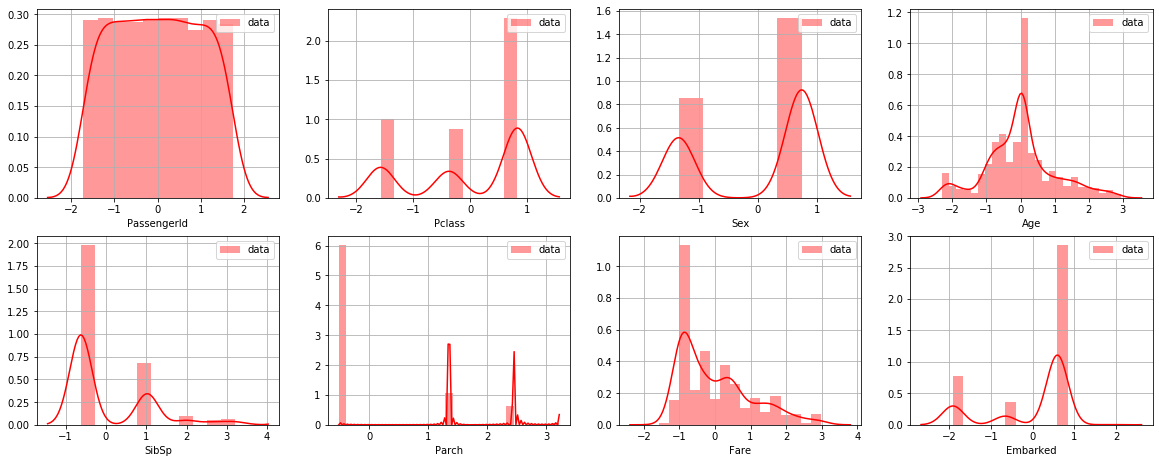

In [35]:
# plotting Distplot 
plt.figure(figsize=(20,16))
for i,col in enumerate(list(x.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(x[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

In [36]:
# checking skewness
x.skew()

PassengerId    0.008182
Pclass        -0.631176
Sex           -0.594266
Age            0.275362
SibSp          1.409871
Parch          1.604684
Fare           0.955913
Embarked      -1.208124
dtype: float64

In [37]:
x.shape

(844, 8)

In [38]:
y.shape

(844,)

### using grid search cv

In [39]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,cv):
    clf = GridSearchCV(mod,parameters, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)

In [40]:
#     Grid Search for DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,10)


{'criterion': 'gini', 'max_depth': 4, 'random_state': 2}


In [41]:
#     Grid Search for GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(gbc,parameters,10)


{'learning_rate': 0.001, 'n_estimators': 1000}


In [42]:
#     Grid Search for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,10)

{'n_neighbors': 9}


In [43]:
#     Grid Search for SVC
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4]}
grid_cv(svc,parameters,10)

{'gamma': 0.001, 'random_state': 1}


In [44]:
#     Grid Search for LogisticRegression
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_cv(lr,parameters,10)

{'C': 0.1}


In [45]:
#     Grid Search for RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [200, 700,1000,2000],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,10)

{'max_features': 'log2', 'n_estimators': 700}


In [46]:
#           Defining Instances For Differnt Models.
KNN=KNeighborsClassifier(n_neighbors=9)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.1)
DT=DecisionTreeClassifier(max_depth=4,random_state=2)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.001,n_estimators=1000)
RF=RandomForestClassifier(max_features= 'auto',n_estimators=2000,criterion='entropy')

In [47]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
       # print('r2 score corresponding to random state ',r_state,'is: ',acc_score)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [48]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  55 is: 0.8655913978494624


Learning Score :  0.8655913978494624
Accuracy Score :  0.8655913978494624


Cross Val Score :  0.8175105463872295


roc auc score :  0.8517133204633205


Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       112
         1.0       0.87      0.78      0.82        74

    accuracy                           0.87       186
   macro avg       0.87      0.85      0.86       186
weighted avg       0.87      0.87      0.86       186



Confusion Matrix:
 [[103   9]
 [ 16  58]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_w

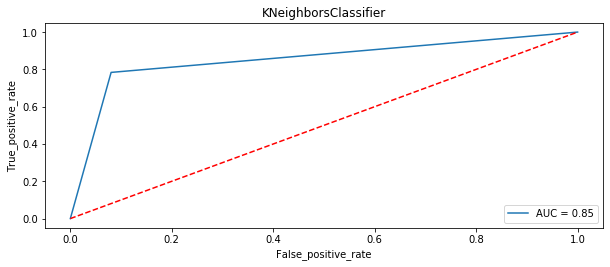

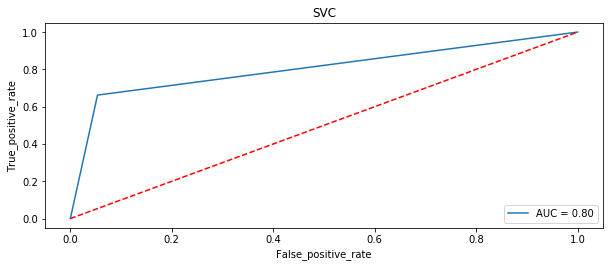

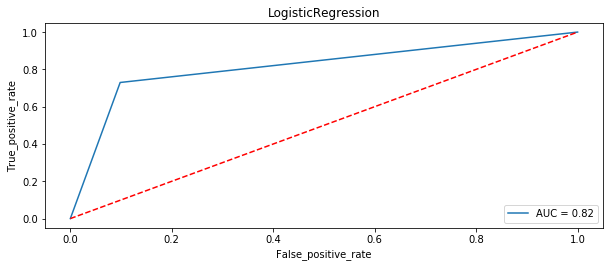

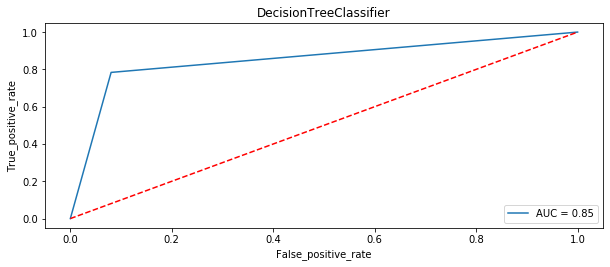

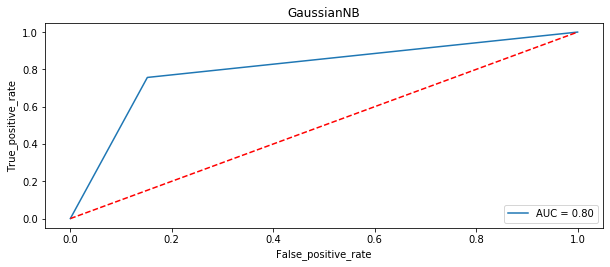

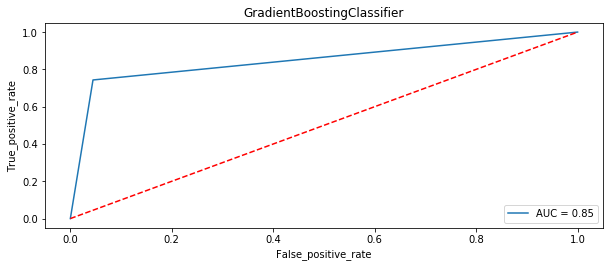

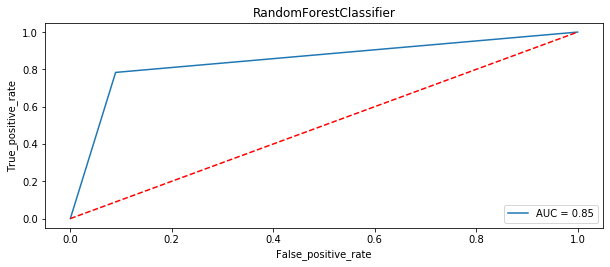

In [49]:
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
    score=model.score(x_test, y_test)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    print('\n')
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
    
#roc auc score    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')
    
    
    
    

In [50]:
#  Conclusion
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'Accuracy Score':Acc_score,'Cross Val Score':cvs,'Roc_Auc_curve':rocscore})  
result

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,86.559140,86.559140,81.751055,85.171332
1,SVC,83.333333,83.333333,79.385475,80.429537
2,LogisticRegression,83.333333,83.333333,78.682427,81.575772
3,DecisionTreeClassifier,86.559140,86.559140,79.878708,85.171332
4,GaussianNB,81.182796,81.182796,76.438595,80.248552
5,GradientBoostingClassifier,87.096774,87.096774,81.525767,84.930019
6,RandomForestClassifier,86.021505,86.021505,81.518629,84.724903


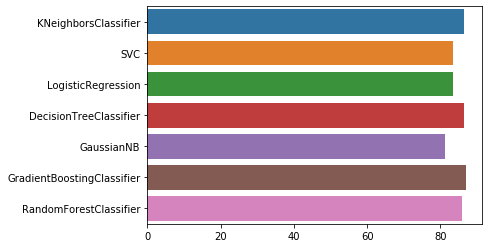

In [51]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

### After all this process conclusion is that GradientBoostingClassifier is performing well.

In [52]:
#As i am getting highest accuracy score for GradientBoostingClassifier thus using adabooster for the same.

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=62,test_size=.22,stratify=y)
gbc=GradientBoostingClassifier(n_estimators=1000)
gbc.fit(x, y)
d=gbc.score(x_train,y_train)
print("Score",d)
gbcpred=gbc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,gbcpred),'\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,gbcpred),'\n')
print('Classification Report:','\n',classification_report(y_test,gbcpred))



Score 1.0
Accuracy Score: 1.0 

Confusion Matrix: 
 [[112   0]
 [  0  74]] 

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       112
         1.0       1.00      1.00      1.00        74

    accuracy                           1.00       186
   macro avg       1.00      1.00      1.00       186
weighted avg       1.00      1.00      1.00       186



(2.0, 0.0)

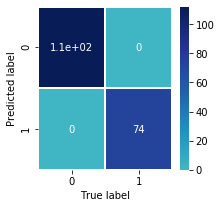

In [53]:
# Plotting Confusion matrix
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, gbcpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [54]:
y_test

241    1.0
759    1.0
135    0.0
429    1.0
569    1.0
      ... 
443    1.0
876    0.0
313    0.0
376    1.0
886    0.0
Name: Survived, Length: 186, dtype: float64

In [55]:
pd.crosstab(df_titanic["Sex"], df_titanic["Survived"])

Survived,0,1
Sex,,
0,81,233
1,468,109


In [56]:
from sklearn.externals import joblib
joblib.dump(gbc,'Titanic_Dataset.pkl')

['Titanic_Dataset.pkl']

In [57]:
final=joblib.load('Titanic_Dataset.pkl')
joblib_y_preds = final.predict(x_test)
joblib_y_preds

array([1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])